In [1]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['timezone'] = 'Europe/London'

import pandas

from datetime import datetime

In [2]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)
documents1 = data.loc['2020-07-15 00:00:00':]
documents1[documents1.time_total > 2]


,Timestamp,CarId,HTTPResponse,time_namelookup,time_connect,time_appconnect,time_pretransfer,time_redirect,time_starttransfer,time_total
datetime,,,,,,,,,,
2020-07-15 10:06:20,1594807580,https://europe-west1-fcg-dev-4.cloudfunctions....,200,0.004464,0.019811,0.071782,0.072032,0.0,7.160388,7.160558
2020-07-15 10:56:30,1594810590,https://europe-west1-fcg-dev-4.cloudfunctions....,200,0.012773,0.027958,0.081460,0.081770,0.0,7.944123,7.944281
2020-07-15 11:38:30,1594813110,https://europe-west1-fcg-dev-4.cloudfunctions....,200,0.013347,0.029986,0.081661,0.081947,0.0,7.303995,7.304122
2020-07-15 12:45:13,1594817113,https://europe-west1-fcg-dev-4.cloudfunctions....,500,0.029102,0.044724,0.100093,0.100398,0.0,8.302307,8.302460
2020-07-15 13:06:47,1594818407,https://europe-west1-fcg-dev-4.cloudfunctions....,500,0.029911,0.045614,0.097614,0.097872,0.0,6.984663,6.984824
2020-07-15 15:01:10,1594825270,https://europe-west1-fcg-dev-4.cloudfunctions....,500,0.013113,0.028279,0.078419,0.078702,0.0,7.939135,7.939296
2020-07-15 16:33:35,1594830815,https://europe-west1-fcg-dev-4.cloudfunctions....,500,0.029289,0.044543,0.096121,0.096407,0.0,6.377772,6.377934
2020-07-15 19:30:55,1594841455,https://europe-west1-fcg-dev-4.cloudfunctions....,200,0.004294,0.019060,0.070640,0.070929,0.0,7.697227,7.697387
2020-07-15 19:58:11,1594843091,https://europe-west1-fcg-dev-4.cloudfunctions....,404,0.012569,0.028618,0.083737,0.084040,0.0,7.688395,7.688559


<IPython.core.display.Javascript object>


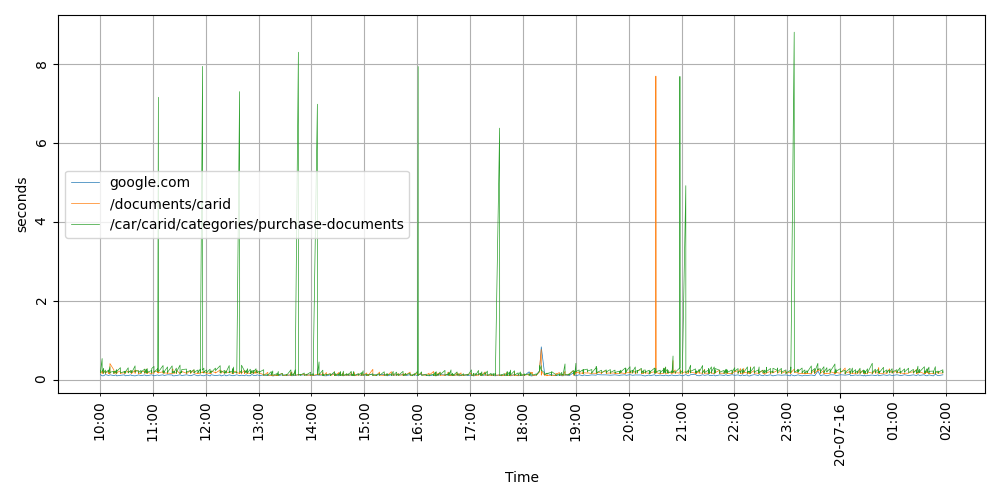

In [4]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)




plt.figure()
#period = "3600s"
#rolling = data["SNR1"].rolling(period).mean()
#plt.plot(rolling, label=period + " average");

data = data.loc['2020-07-15 09:00:00':'2020-07-16 01:00:00']

google=data[data.CarId == "https://google.com"]
documents=data[data.CarId.str.startswith("https://europe-west1-fcg-dev-4.cloudfunctions.net/ar_k2-gateway/document/")]
purchase=data[data.CarId.str.startswith("https://europe-west1-fcg-dev-4.cloudfunctions.net/ar_k2-gateway/car/")]


plt.plot(google["time_total"], label="google.com", linewidth=0.5)
plt.plot(documents["time_total"], label="/documents/carid", linewidth=0.5)
plt.plot(purchase["time_total"], label="/car/carid/categories/purchase-documents", linewidth=0.5)

plt.ylabel("seconds");
plt.xlabel("Time")

ax = plt.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())

ax.tick_params(axis='x',which='major')
ax.tick_params(which='both', rotation=90)
ax.xaxis.grid(True, which='both')
ax.yaxis.grid(True, which='major')

#ax.set_ylim([-6, 21])
plt.legend()
plt.tight_layout()